In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
{'Sleeping': 0, 'Other': 1, 'Bed_to_Toilet': 2, 'Meal_Preparation': 3, 'Relax': 4, 'Housekeeping': 5, 'Eating': 6, 'Wash_Dishes': 7, 'Leave_Home': 8, 'Enter_Home': 9, 'Work': 10, 'Respirate': 11}

{'Sleeping': 0,
 'Other': 1,
 'Bed_to_Toilet': 2,
 'Meal_Preparation': 3,
 'Relax': 4,
 'Housekeeping': 5,
 'Eating': 6,
 'Wash_Dishes': 7,
 'Leave_Home': 8,
 'Enter_Home': 9,
 'Work': 10,
 'Respirate': 11}

In [2]:
x = np.load(r'/Users/zehaokou/Desktop/Technion/AI/plot/new_processing/step1_state_index.npy',allow_pickle=True)
#x = x.astype(int)
y = np.load(r'/Users/zehaokou/Desktop/Technion/AI/plot/new_processing/step1_padding100/new_processing_100_padded_step1_Y.npy',allow_pickle=True)
y = y.astype(str)

In [3]:
activity8 = []
for i in range(np.size(y)):
    if y[i] == '8':
        activity8.append(i)
        
activity9 = []
for i in range(np.size(y)):
    if y[i] == '9':
        activity9.append(i)

In [4]:
result = []
enter_count = 0
leave_count = 0

for i in range(430):
    not_nan_count_leave = np.sum(~np.isnan(x[activity8[i]-1]))
    leave = np.sum(~np.isnan(x[activity8[i]]))
    # print(not_nan_count_leave)
    result.append({'St-1':'other', 'Lt-1':not_nan_count_leave, 'St':'leave home'})
    leave_count += 1

    not_nan_count_enter = np.sum(~np.isnan(x[activity9[i]-1]))
    enter = np.sum(~np.isnan(x[activity9[i]]))
    # print(not_nan_count_enter)
    result.append({'St-1':'other', 'Lt-1':not_nan_count_enter, 'St':'enter home'})
    enter_count += 1

In [118]:
df = pd.DataFrame(result)
df

,St-1,Lt-1,St
0,other,100,leave home
1,other,1,enter home
2,other,10,leave home
3,other,1,enter home
4,other,41,leave home
...,...,...,...
855,other,2,enter home
856,other,11,leave home
857,other,1,enter home
858,other,100,leave home


In [119]:
# leave = 1 则计算leave的Transition Probability
# df['St'] = df['St'].replace({'leave home': 1, 'enter home': 0})
df['St'] = df['St'].replace({'leave home': 0, 'enter home': 1})
df

,St-1,Lt-1,St
0,other,100,0
1,other,1,1
2,other,10,0
3,other,1,1
4,other,41,0
...,...,...,...
855,other,2,1
856,other,11,0
857,other,1,1
858,other,100,0


In [ ]:
L_mean = df['Lt-1'].sum()/860
print(L_mean)
P_mean = 0.5

# each value minus the mean
df['Lt-1 - L_mean'] = df['Lt-1'] - L_mean
df['St - P_mean'] = df['St'] - P_mean
df['product'] = df['Lt-1 - L_mean'] * df['St - P_mean']
df['square'] = df['Lt-1 - L_mean']**2
df

43.12093023255814


,St-1,Lt-1,St,Lt-1 - L_mean,St - P_mean,product,square
0,other,100,0,56.87907,-0.5,-28.439535,3235.228578
1,other,1,1,-42.12093,0.5,-21.060465,1774.172764
2,other,10,0,-33.12093,-0.5,16.560465,1096.996019
3,other,1,1,-42.12093,0.5,-21.060465,1774.172764
4,other,41,0,-2.12093,-0.5,1.060465,4.498345
...,...,...,...,...,...,...,...
855,other,2,1,-41.12093,0.5,-20.560465,1690.930903
856,other,11,0,-32.12093,-0.5,16.060465,1031.754159
857,other,1,1,-42.12093,0.5,-21.060465,1774.172764
858,other,100,0,56.87907,-0.5,-28.439535,3235.228578


In [121]:
alpha = df['product'].sum()/df['square'].sum()
alpha

-0.009833635732615876

In [122]:
beta = P_mean - alpha * L_mean
beta

0.92403552035852

In [115]:
# P_LEAVE = 0.00983 * df['Lt-1'] + 0.07596
# P_ENTER = -0.00983 * df['Lt-1'] + 0.92404

0      1.059328
1      0.085798
2      0.174301
3      0.085798
4      0.479144
         ...   
855    0.095632
856    0.184134
857    0.085798
858    1.059328
859    0.085798
Name: Lt-1, Length: 860, dtype: float64

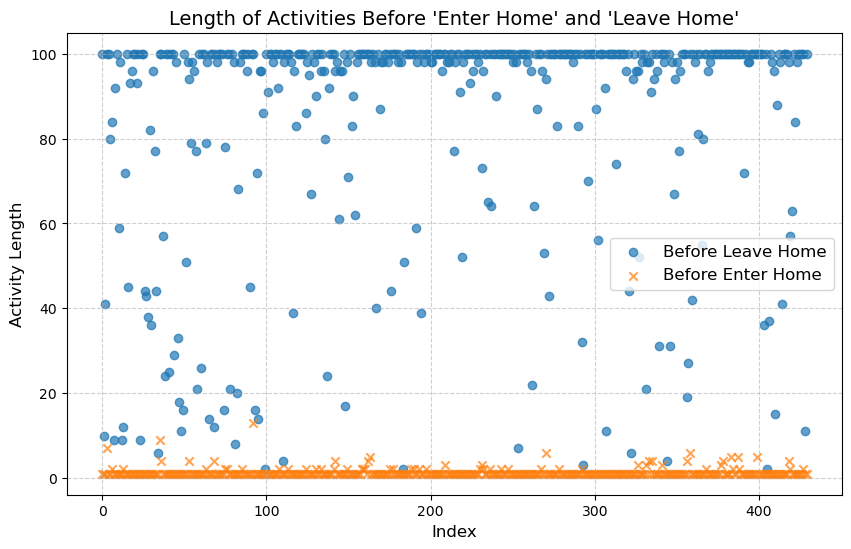

In [ ]:
x[x < 0.2] = np.nan

activity8 = [i for i in range(np.size(y)) if y[i] == '8']
activity9 = [i for i in range(np.size(y)) if y[i] == '9']

# Calculate non-NaN counts for activity8 (leave home) and activity9 (enter home)
not_nan_counts_leave = [np.sum(~np.isnan(x[activity8[i] - 1])) for i in range(min(430, len(activity8)))]
not_nan_counts_enter = [np.sum(~np.isnan(x[activity9[i] - 1])) for i in range(min(430, len(activity9)))]

# Create scatter plot to intuitively represent the lengths
plt.figure(figsize=(10, 6))
plt.scatter(range(len(not_nan_counts_leave)), not_nan_counts_leave, label="Before Leave Home", alpha=0.7, marker='o')
plt.scatter(range(len(not_nan_counts_enter)), not_nan_counts_enter, label="Before Enter Home", alpha=0.7, marker='x')

plt.title("Length of Activities Before 'Enter Home' and 'Leave Home'", fontsize=14)
plt.xlabel("Index", fontsize=12)
plt.ylabel("Activity Length", fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

plt.savefig('enter_leave.svg')
plt.show()

# logistic regression

## aruba

In [68]:
x = np.load(r'/Users/zehaokou/Desktop/Technion/AI/plot/new_processing/step1_state_index.npy',allow_pickle=True)
y = np.load(r'/Users/zehaokou/Desktop/Technion/AI/plot/new_processing/step1_padding100/new_processing_100_padded_step1_Y.npy',allow_pickle=True)
y = y.astype(str)

activity8 = []
for i in range(np.size(y)):
    if y[i] == '8':
        activity8.append(i)
        
activity9 = []
for i in range(np.size(y)):
    if y[i] == '9':
        activity9.append(i)

In [69]:
result = []
enter_count = 0
leave_count = 0

for i in range(430):
    not_nan_count_leave = np.sum(~np.isnan(x[activity8[i]-1]))
    leave = np.sum(~np.isnan(x[activity8[i]]))
    # print(not_nan_count_leave)
    result.append({'St-1':'other', 'Lt-1':not_nan_count_leave, 'St':'leave home'})
    leave_count += 1

    not_nan_count_enter = np.sum(~np.isnan(x[activity9[i]-1]))
    enter = np.sum(~np.isnan(x[activity9[i]]))
    # print(not_nan_count_enter)
    result.append({'St-1':'other', 'Lt-1':not_nan_count_enter, 'St':'enter home'})
    enter_count += 1

In [70]:
df = pd.DataFrame(result)
df['St'] = df['St'].replace({'leave home': 1, 'enter home': 0})
df

/var/folders/p7/20f7xrt504ncpy6nhf4tjw480000gn/T/ipykernel_9300/1181091385.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['St'] = df['St'].replace({'leave home': 1, 'enter home': 0})


,St-1,Lt-1,St
0,other,100,1
1,other,1,0
2,other,10,1
3,other,1,0
4,other,41,1
...,...,...,...
855,other,2,0
856,other,11,1
857,other,1,0
858,other,100,1


In [71]:
from sklearn.linear_model import LogisticRegression

L_mean = df['Lt-1'].sum()/860
print(L_mean)
L_centered = df['Lt-1'] - L_mean

model = LogisticRegression(fit_intercept=True)
model.fit(L_centered.values.reshape(-1, 1), df['St'])

alpha = model.coef_[0][0]
beta = model.intercept_[0]

print(f"alpha = {alpha:.5f}, beta = {beta:.5f}")

43.12093023255814
alpha = 0.74987, beta = 26.96675


In [72]:
y_pred = model.predict(L_centered.values.reshape(-1, 1))
y_pred

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

cm  = confusion_matrix(df['St'], y_pred)

report = classification_report(df['St'], y_pred)
report

'              precision    recall  f1-score   support\n\n           0       0.98      1.00      0.99       430\n           1       1.00      0.98      0.99       430\n\n    accuracy                           0.99       860\n   macro avg       0.99      0.99      0.99       860\nweighted avg       0.99      0.99      0.99       860\n'

## without preceding activity

In [73]:
import scipy.stats as stats

result_base = []
enter_count_base = 0
leave_count_base = 0

for i in range(430):
    leave = np.sum(~np.isnan(x[activity8[i]]))
    # print(not_nan_count_leave)
    result_base.append({'Lt':leave, 'St':'leave home'})
    leave_count_base += 1

    not_nan_count_enter = np.sum(~np.isnan(x[activity9[i]]))
    enter = np.sum(~np.isnan(x[activity9[i]]))
    # print(not_nan_count_enter)
    result_base.append({'Lt':enter, 'St':'enter home'})
    enter_count_base += 1

df_base = pd.DataFrame(result_base)
df_base['St'] = df_base['St'].replace({'leave home': 1, 'enter home': 0})
df_base

/var/folders/p7/20f7xrt504ncpy6nhf4tjw480000gn/T/ipykernel_9300/2033471424.py:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_base['St'] = df_base['St'].replace({'leave home': 1, 'enter home': 0})


,Lt,St
0,3,1
1,4,0
2,3,1
3,4,0
4,22,1
...,...,...
855,5,0
856,3,1
857,6,0
858,4,1


In [74]:
L_mean = df_base['Lt'].sum()/860
print(L_mean)
L_centered = df_base['Lt'] - L_mean

model = LogisticRegression(fit_intercept=True)
model.fit(L_centered.values.reshape(-1, 1), df_base['St'])

alpha_base = model.coef_[0][0]
beta_base = model.intercept_[0]

print(f"alpha_base = {alpha_base:.5f}, beta_base = {beta_base:.5f}")

4.588372093023255
alpha_base = -0.02109, beta_base = -0.00002


In [75]:
y_base_pred = model.predict(L_centered.values.reshape(-1, 1))

cm_base = confusion_matrix(df_base['St'], y_base_pred)
print(cm_base)

report_base = classification_report(df_base['St'], y_base_pred)
print(report_base)

[[175 255]
 [119 311]]
              precision    recall  f1-score   support

           0       0.60      0.41      0.48       430
           1       0.55      0.72      0.62       430

    accuracy                           0.57       860
   macro avg       0.57      0.57      0.55       860
weighted avg       0.57      0.57      0.55       860



## nemar's test

In [80]:
df["with"] = y_pred
df["without"] = y_base_pred
print(df)
df['nemar'] = df['with'] - df['without']
print(df['nemar'].value_counts())

# McNemar's test
chi = (261-188-1)**2/(261+188)
chi


      St-1  Lt-1  St  with  without  nemar
0    other   100   1     1        1      0
1    other     1   0     0        1     -1
2    other    10   1     1        1      0
3    other     1   0     0        1     -1
4    other    41   1     1        0      1
..     ...   ...  ..   ...      ...    ...
855  other     2   0     0        0      0
856  other    11   1     1        1      0
857  other     1   0     0        0      0
858  other   100   1     1        1      0
859  other     1   0     0        1     -1

[860 rows x 6 columns]
nemar
 0    481
-1    261
 1    118
Name: count, dtype: int64


11.5456570155902

## milan

In [17]:
x = np.load(r'X.npy',allow_pickle=True)
y = np.load(r'Y.npy',allow_pickle=True)
y = y.astype(str)

activity1 = []
for i in range(np.size(y)):
    if y[i] == '1':
        activity1.append(i)
        
activity3 = []
for i in range(np.size(y)):
    if y[i] == '3':
        activity3.append(i)

In [18]:
result = []
enter_count = 0
leave_count = 0

for i in range(len(activity1)):
    not_nan_count_leave = np.sum(~np.isnan(x[activity1[i]-1]))
    leave = np.sum(~np.isnan(x[activity1[i]]))
    # print(not_nan_count_leave)
    result.append({'St-1':'other', 'Lt-1':not_nan_count_leave, 'St':'bed2toilet'})
    leave_count += 1


for i in range(len(activity3)):
    not_nan_count_enter = np.sum(~np.isnan(x[activity3[i]-1]))
    enter = np.sum(~np.isnan(x[activity3[i]]))
    # print(not_nan_count_enter)
    result.append({'St-1':'other', 'Lt-1':not_nan_count_enter, 'St':'master bathroom'})
    enter_count += 1

df = pd.DataFrame(result)
df['St'] = df['St'].replace({'master bathroom': 1, 'bed2toilet': 0})

/var/folders/p7/20f7xrt504ncpy6nhf4tjw480000gn/T/ipykernel_83378/3797573269.py:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['St'] = df['St'].replace({'master bathroom': 1, 'bed2toilet': 0})


In [19]:
from sklearn.linear_model import LogisticRegression

L_mean = df['Lt-1'].sum()/(len(activity1)+len(activity3))
print(L_mean)
L_centered = df['Lt-1'] - L_mean

model = LogisticRegression(fit_intercept=True)
model.fit(L_centered.values.reshape(-1, 1), df['St'])

alpha = model.coef_[0][0]
beta = model.intercept_[0]

print(f"alpha = {alpha:.5f}, beta = {beta:.5f}")

93.09746161078031
alpha = 0.03507, beta = 4.11385


In [21]:
y_pred = model.predict(L_centered.values.reshape(-1, 1))
y_pred

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

cm  = confusion_matrix(df['St'], y_pred)
print(cm)

report = classification_report(df['St'], y_pred)
print(report)

[[   0   88]
 [   0 3103]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        88
           1       0.97      1.00      0.99      3103

    accuracy                           0.97      3191
   macro avg       0.49      0.50      0.49      3191
weighted avg       0.95      0.97      0.96      3191



/Users/zehaokou/miniconda3/envs/csi/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/zehaokou/miniconda3/envs/csi/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/zehaokou/miniconda3/envs/csi/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

## without preceding activities

In [23]:
import scipy.stats as stats

result_base = []
enter_count_base = 0
leave_count_base = 0

for i in range(len(activity1)):
    leave = np.sum(~np.isnan(x[activity1[i]]))
    # print(not_nan_count_leave)
    result_base.append({'Lt':leave, 'St':'bed2toilet'})
    leave_count_base += 1

for i in range(len(activity3)):
    not_nan_count_enter = np.sum(~np.isnan(x[activity3[i]]))
    enter = np.sum(~np.isnan(x[activity3[i]]))
    # print(not_nan_count_enter)
    result_base.append({'Lt':enter, 'St':'master bathroom'})
    enter_count_base += 1

df_base = pd.DataFrame(result_base)
df_base['St'] = df_base['St'].replace({'master bathroom': 1, 'bed2toilet': 0})
df_base

/var/folders/p7/20f7xrt504ncpy6nhf4tjw480000gn/T/ipykernel_83378/603506165.py:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_base['St'] = df_base['St'].replace({'master bathroom': 1, 'bed2toilet': 0})


,Lt,St
0,17,0
1,26,0
2,11,0
3,22,0
4,13,0
...,...,...
3186,100,1
3187,100,1
3188,100,1
3189,100,1


In [24]:
L_mean = df_base['Lt'].sum()/3191
print(L_mean)
L_centered = df_base['Lt'] - L_mean

model = LogisticRegression(fit_intercept=True)
model.fit(L_centered.values.reshape(-1, 1), df_base['St'])

alpha_base = model.coef_[0][0]
beta_base = model.intercept_[0]

print(f"alpha_base = {alpha_base:.5f}, beta_base = {beta_base:.5f}")

91.64963961140708
alpha_base = 0.09385, beta_base = 8.01282


In [25]:
y_base_pred = model.predict(L_centered.values.reshape(-1, 1))

cm_base = confusion_matrix(df_base['St'], y_base_pred)
print(cm_base)

report_base = classification_report(df_base['St'], y_base_pred)
print(report_base)

[[   6   82]
 [  13 3090]]
              precision    recall  f1-score   support

           0       0.32      0.07      0.11        88
           1       0.97      1.00      0.98      3103

    accuracy                           0.97      3191
   macro avg       0.64      0.53      0.55      3191
weighted avg       0.96      0.97      0.96      3191



In [27]:
df["with"] = y_pred
df["without"] = y_base_pred
print(df)
df['nemar'] = df['with'] - df['without']
print(df['nemar'].value_counts())

# McNemar's test
chi = (19-1)**2/(19)
chi


       St-1  Lt-1  St  with  without  nemar
0     other    82   0     1        1      0
1     other    43   0     1        1      0
2     other   100   0     1        1      0
3     other     1   0     1        1      0
4     other    60   0     1        1      0
...     ...   ...  ..   ...      ...    ...
3186  other   100   1     1        1      0
3187  other   100   1     1        1      0
3188  other   100   1     1        1      0
3189  other   100   1     1        1      0
3190  other   100   1     1        1      0

[3191 rows x 6 columns]
nemar
0    3172
1      19
Name: count, dtype: int64


17.05263157894737

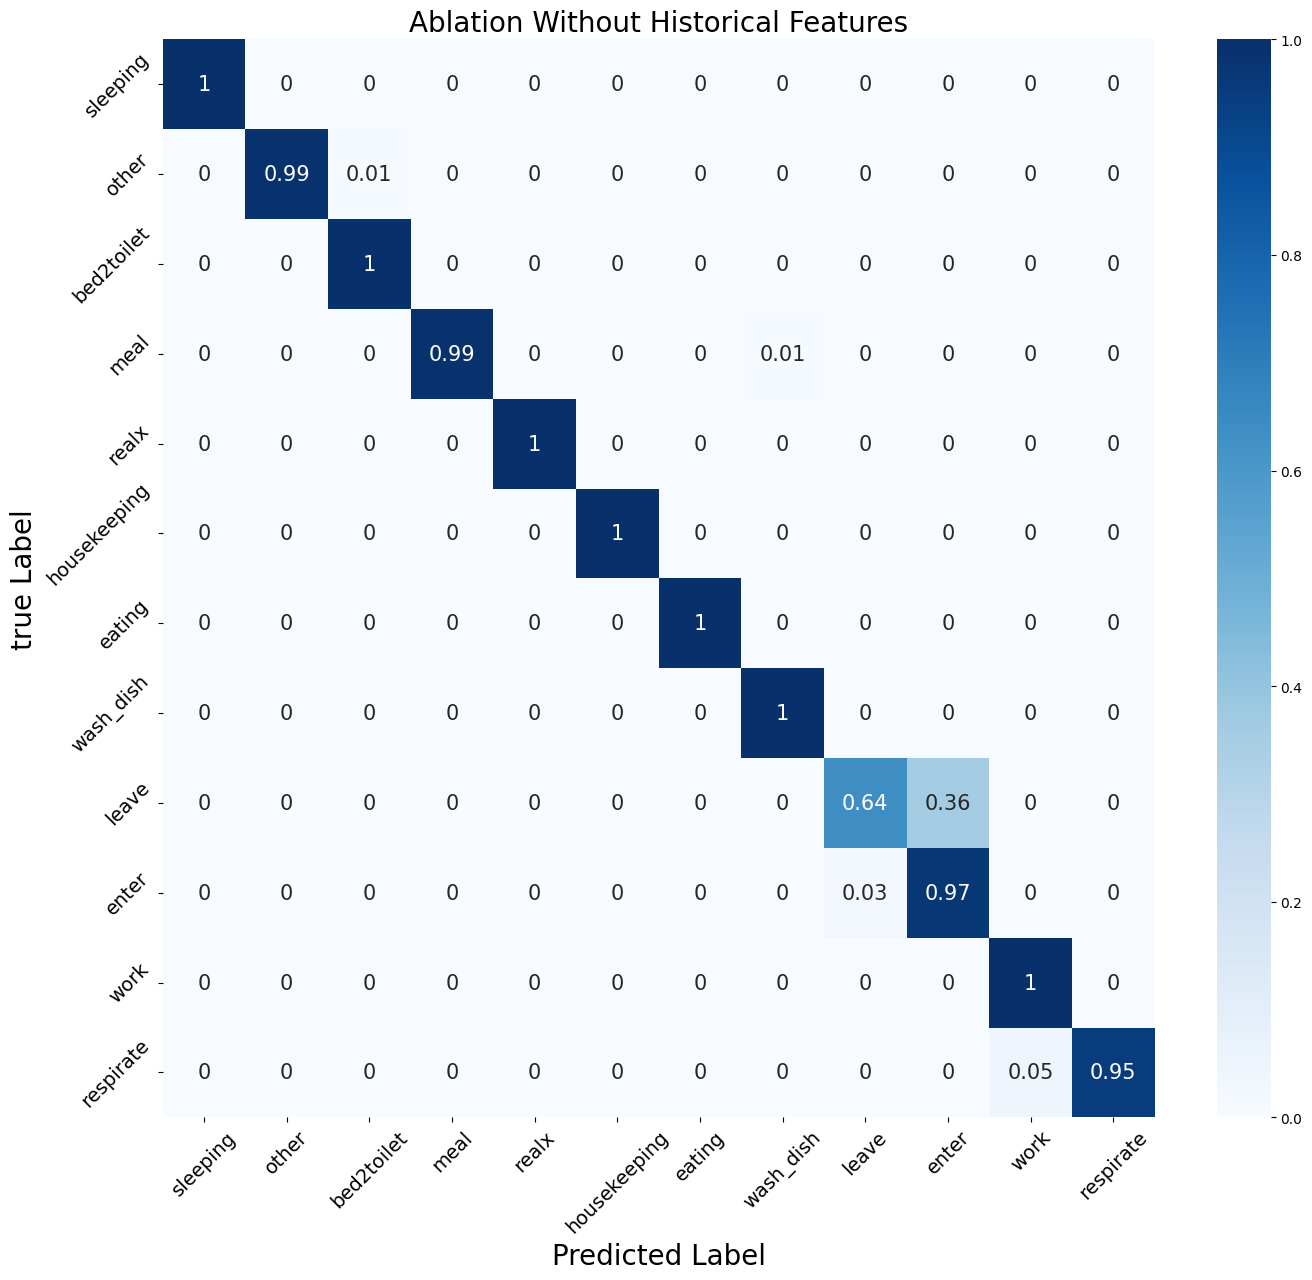

In [30]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Confusion matrix from the image
cm = np.array([
    [401, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 396, 3, 0, 1, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 32, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 398, 0, 0, 0, 3, 0, 0, 0, 0],
    [0, 0, 0, 0, 400, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 400, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 400, 0, 0, 0, 0, 0],
    [0, 1, 0, 1, 0, 0, 0, 399, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 56, 31, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 3, 84, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 401, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 19]
])

con_mat_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # 归一化
con_mat_norm = np.around(con_mat_norm, decimals=2)

fig, ax = plt.subplots(figsize=(16, 14)) #14, 12
sns.heatmap(con_mat_norm, annot=True, cmap='Blues',annot_kws={'size':15},)

plt.title("Ablation Without Historical Features", fontsize = 20)
plt.xlabel('Predicted Label', fontsize = 20)
plt.ylabel('true Label', fontsize = 20)

ax.set_xticklabels(['sleeping', 'other', 'bed2toilet', 'meal', 'realx', 'housekeeping', 'eating', 'wash_dish', 'leave',
                    'enter', 'work', 'respirate'],rotation=45, fontsize=14)
ax.set_yticklabels(['sleeping', 'other', 'bed2toilet', 'meal', 'realx', 'housekeeping', 'eating', 'wash_dish', 'leave',
                    'enter', 'work', 'respirate'],rotation=45, fontsize=14)


plt.savefig("cm.pdf", bbox_inches = 'tight')
plt.show()

In [35]:
print(len(activity3))
print(np.size(y))

3103
210285
